# problem 3 (15 points)

Given the function f (x) = x^2 + 6x:

1. Use derivative of f (x) to find the value of x that minimizes this function.
(2 points)

- f(x)' = 2x + 
6
- suppose f(x)' = 0

- 0 = 2x + 6

- -2x = 6

- x = -3

Get the minumize value x = -3

2. Use gradient descent to find the value of x that minimizes this function.
Compare your answer with the previous part. (13 points)

In [38]:
import pandas as pd
import numpy as np
# Gradient Descent equation:
# new w = old w  - alpha * f(x)dx
# alpha = learning rate

def df(x):
    return (2 * x) + 6

w = 5 # randomly choose inital point
iteration_time = 100
alpha = 0.1 # learning rate

for i in range(iteration_time):
    
    gradient = df(w)
    new_w = w - alpha * gradient
    

    if abs(new_w - w) < 1e-6: # set the limit to break the loop
        break
    w  = new_w

print(f"found the minimum value: {new_w:.3f} at {i} iteration ")

found the minimum value: -3.000 at 65 iteration 


# Problem 4 (35 points)

The Space Shuttle Challenger disaster occurred on January 28, 1986, when it
broke apart 73 seconds into its flight, leading to the deaths of its seven crew
members. The spacecraft disintegrated over the Atlantic Ocean, off the coast
of central Florida at 11:38 EST. Disintegration of the entire vehicle began after
an O-ring seal in its right solid rocket booster failed at liftoff. Subsequently, a
special commission was appointed to investigate the accident. The commission
found that NASA disregarded warnings from engineers about the dangers of
launching posed by the low temperatures of that morning, claiming that en-
gineers could not provide a convincing argument against the launch (source:
Wikipedia, Applied Probability for Engineers).

File Oring.csv provides data on launch temperature and O-ring failure for
the 24-space shuttle launches prior to the Challenger disaster. There are six
O-rings used to seal field joints on the rocket motor assembly. A +1 in the
O-rings indicates that at least one O-ring failure had occurred on that launch
and a 0 indicates that no failure had occurred.

1. Normalize the launch temperature using the expression x−µ
/ σ . (3 points)

In [39]:
data = pd.read_csv('ORing.csv')
# µ = mean
# σ = standard deviation
x = data['Temp'].values
u = np.mean(x)
std_dev = np.std(x)
normal_x = (x - u) / std_dev
# add to DataFrame
data['Noramlize Temp'] = normal_x
data.head()

,Temp,Failure,Noramlize Temp
0,53,1,-2.342325
1,56,1,-1.926937
2,57,1,-1.788475
3,63,0,-0.957699
4,66,0,-0.542312


2. Create a logistic regression model using the gradient decent technique to
predict the probability of O-ring failure based on the launch temperature.
Provide the equation for your model. You can NOT use built-in packages
for this problem. (20 points)

$$
\nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{m} \mathbf{X}^T \left( h_{\mathbf{w}}(\mathbf{X}) - \mathbf{y} \right)
$$

In [55]:
# Logistic funcion
def segmoid(z):
    equation = 1 / (1 + np.exp(-z))
    return equation


# Logistic regression

train_x = data['Noramlize Temp'].values
train_y = data['Failure'].values

# Add bias in order to do calculation
# should use tuple to stack the arrray
train_x_bias = np.column_stack((np.ones(train_x.shape), train_x))
learning_rate = 0.01

# get the shpae value from the data
m, n = train_x_bias.shape

# the shape of w should match the number of feature
    # create the empty w
inital_w = np.zeros(n)

for i in range(1000):
    z = np.dot(train_x_bias, inital_w)
    predict = segmoid(z)
    # Based on the equation
    gradient = train_x_bias.T @ (predict - train_y) / m

    new_w = inital_w - learning_rate * gradient
    inital_w = new_w

new_w

array([-0.8497899 , -0.92039882])

3. Provide a plot of the original data along with your logistic model. (5
points)

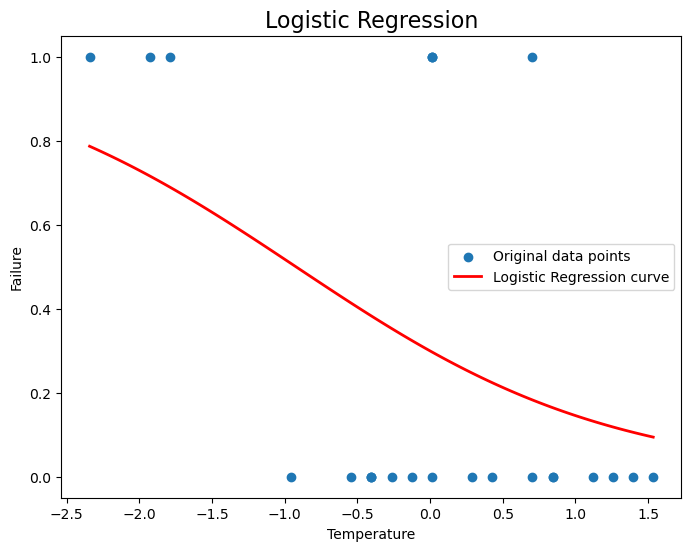

In [70]:
import matplotlib.pyplot as plt

# generate the range
x_range = np.linspace(train_x.min(), train_x.max(), 100)
# get the clean data with bias
x_range_bias = np.column_stack((np.ones(x_range.shape), x_range))

# get y value based on new weight
y_val = segmoid(x_range_bias @ new_w)

plt.figure(figsize=(8, 6))

plt.scatter(train_x, train_y, label='Original data points')
plt.plot(x_range, y_val, linewidth =2, label = 'Logistic Regression curve', color='red')
plt.title('Logistic Regression', fontsize = 16)
plt.xlabel('Temperature')
plt.ylabel('Failure')

plt.legend()
plt.show()

4. The actual temperature at the Challenger launch was 31 degrees Fahren-
heit. According to your model what was the probability of O-ring failure
on the Challenger launch? Could the engineers have used your model to
provide a convincing argument to NASA? Elaborate. (7 points)

In [77]:
# input x = 31
# normalize again
engin_temp_normal = (31 - u )/ std_dev
# use logistic function to calculate the probability 
failure = segmoid(new_w[0] + new_w[1] * engin_temp_normal)

print(f"When Temp: 31, the failure possibility: {failure:.3f}")

When Temp: 31, the failure possibility: 0.984


According the result, the O-ring have 98% chance will crush